# Name: Soumik Karmakar

## The Sparks Foundation: Graduation Rotational Internship Program - March,2021

### Data Science and Business Analytics Intern

### Task 1 - Prediction using Supervised ML

### Probem: Prediction of  the percentage of an student based on the number of study hours.

#### Importing required liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the Dataset

In [3]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
try:
    data = pd.read_csv(url)
except IOError:
    # This will only check for an IOError exception and then execute this print statement
    print("Error: Could not find file or read data")
else:
    print("Data imported successfully.")

data.head(10)

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Summary of the data

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Scatterplot of the data imported

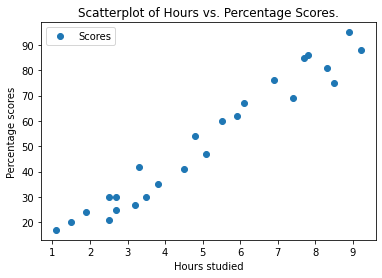

In [30]:
data.plot(x = "Hours", y = "Scores",style = 'o')
plt.title("Scatterplot of Hours vs. Percentage Scores.")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scores")
plt.show()

#### From the scatterplot we can observe that the data has quite positive slope and thus a postive association

#### Calculating the correlation coefficient between Study Hours and Percentage Scores

In [77]:
correlation = data.corr()
print(correlation)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


#### From the correlation coefficient also we can observe that Study hours and Percentage scores have a high positive correlation.


### Data Preparation

#### In the next step the data is divided into "attributes" (inputs) and "labels" (outputs).

In [59]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [60]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [62]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


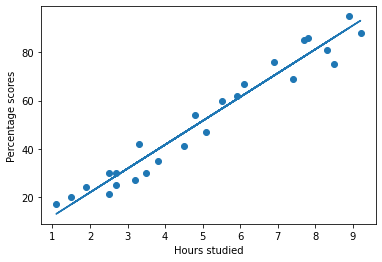

In [65]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours studied")
plt.ylabel("Percentage scores")
plt.show()

### Making Predictions

#### Thus we have trained our algorithm, now we make some predictions.

In [66]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [67]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Testing the model with a value provided.

In [72]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


### Evaluating the model
#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [95]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Square Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Coefficient of Determination (R^2): {}'.format(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Root Mean Square Error: 4.6474476121003665
Coefficient of Determination (R^2): 0.9454906892105356


##### From the above results we can see that the values Mean Absolute Error and the Root Mean Square Error are quite low. Also the value of the coefficient of determination is very high (~ 95%). Hence we can say that the fit is pretty good and the regression explains almost 95% of the variability.